In [59]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [60]:
dataset = pd.read_csv('/kaggle/input/cancer-data-csv/Cancer_Data.csv')

In [61]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [62]:
dataset.shape

(569, 33)

In [63]:
dataset['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [64]:
dataset.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [65]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [66]:
dataset = dataset.drop(labels = 'Unnamed: 32', axis = 1)
dataset = dataset.drop(labels = 'id', axis = 1)

In [67]:
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [68]:
dataset['diagnosis'].replace(['B', 'M'], [0,1], inplace = True)

/tmp/ipykernel_33/2880390393.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['diagnosis'].replace(['B', 'M'], [0,1], inplace = True)
/tmp/ipykernel_33/2880390393.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['diagnosis'].replace(['B', 'M'], [0,1], inplace = True)


In [69]:
dataset['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

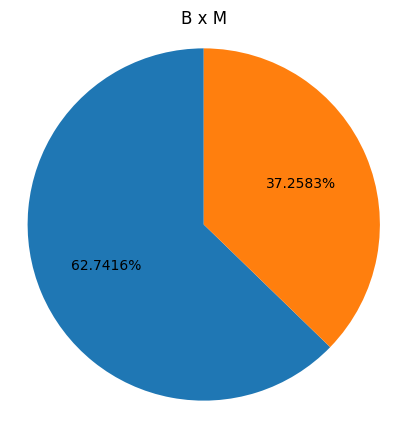

In [70]:
plt.figure(figsize = (5,5))
plt.pie(dataset['diagnosis'].value_counts(), autopct = '%1.4f%%',startangle = 90)
plt.axis('equal')
plt.title('B x M')
plt.show()

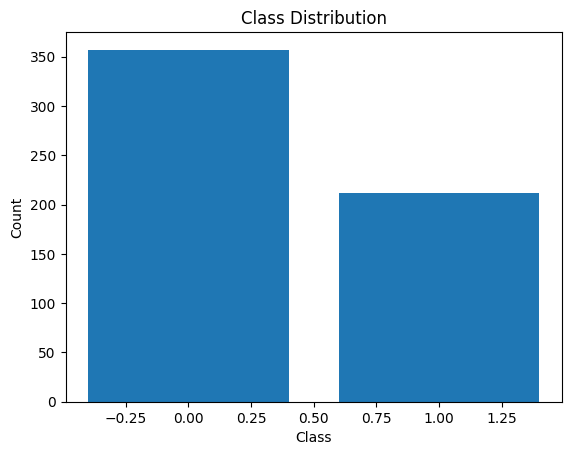

In [71]:
class_counts = dataset['diagnosis'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

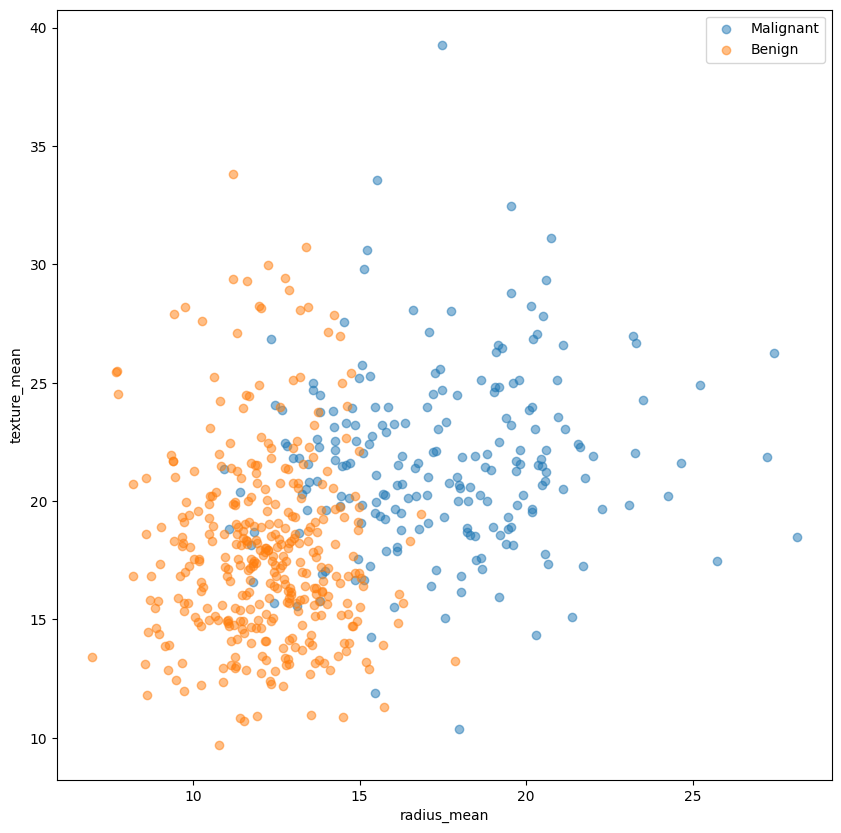

In [72]:
plt.figure(figsize = (10,10))

M = dataset[dataset.diagnosis == 1]
B = dataset[dataset.diagnosis == 0]

#These lines create two separate DataFrames, M and B, by filtering the original DataFrame df based 
#on the values in the 'diagnosis' column

plt.scatter(M.radius_mean, M.texture_mean, label = "Malignant", alpha  = 0.5)
plt.scatter(B.radius_mean, B.texture_mean, label = "Benign", alpha  = 0.5)

# alpha is transparency 

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

plt.legend()
plt.show()

In [73]:
import seaborn as sns
corr_matrix = dataset.corr()
corr_matrix
for column in corr_matrix.columns:
    print(column)

diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


corr_matrix = df.corr(): This line calculates the correlation matrix for the DataFrame df. The correlation matrix is a square matrix that contains the correlation coefficients between pairs of variables in the DataFrame. Each cell in the matrix represents the correlation coefficient between the corresponding row and column in the DataFrame. The correlation coefficient ranges from -1 to 1, where:

-1 indicates a perfect negative correlation,
0 indicates no correlation, and
1 indicates a perfect positive correlation.
corr_matrix: This variable holds the resulting correlation matrix.

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'Reds')
plt.title('Correlation Heatmap')
plt.show()

t-Distributed Stochastic Neighbor Embedding

In [ ]:
x = dataset.iloc[:,1:].values
y = dataset.iloc[:,0]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 32.146998
[t-SNE] Computed conditional probabilities in 0.031s
[t-SNE] Iteration 50: error = 52.9815102, gradient norm = 0.0536143 (50 iterations in 0.149s)
[t-SNE] Iteration 100: error = 49.2113228, gradient norm = 0.0117204 (50 iterations in 0.127s)
[t-SNE] Iteration 150: error = 48.1820717, gradient norm = 0.0097324 (50 iterations in 0.128s)
[t-SNE] Iteration 200: error = 47.7758865, gradient norm = 0.0054799 (50 iterations in 0.134s)
[t-SNE] Iteration 250: error = 47.6019440, gradient norm = 0.0031146 (50 iterations in 0.122s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.601944
[t-SNE] Iteration 300: error = 0.4546103, gradient norm = 0.0138891 (50 iterations in 0.134s)
[t-SNE] Iteration 350: error = 0.3113174, gradient norm = 0.0090249 

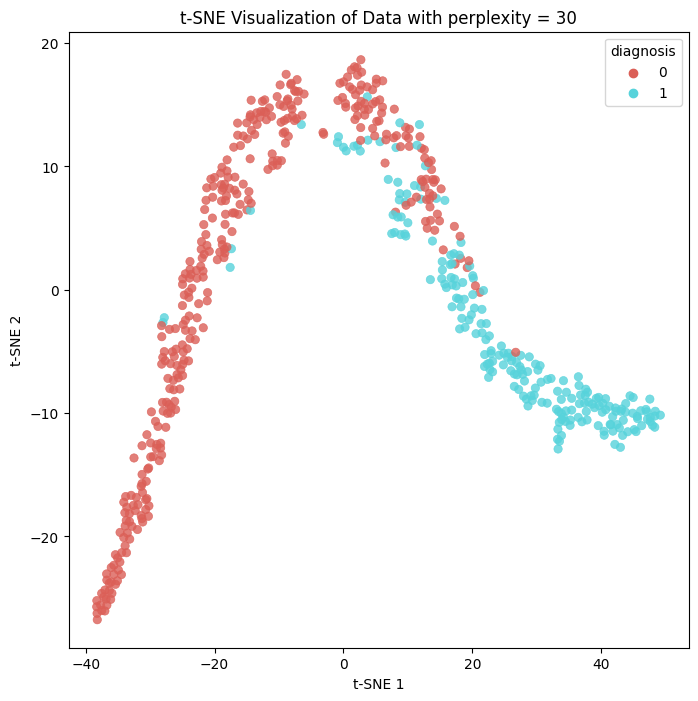

In [76]:
# Applying t-SNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 110, verbose = 2)
x_tsne = tsne.fit_transform(x)

plt.figure(figsize = (8,8))
sns.scatterplot(
    x=x_tsne[:, 0], y=x_tsne[:, 1],  # X and Y coordinates for each point
    hue=y, palette = sns.color_palette("hls",len(np.unique(y))),
    alpha=0.8, edgecolor=None  # Set transparency and remove edge color
)

plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 30')
plt.legend
plt.show()

TSNE (t-distributed Stochastic Neighbor Embedding):

Explanation: t-SNE is a dimensionality reduction technique used to visualize high-dimensional data in a lower-dimensional space (usually 2D or 3D) while preserving the local structure of the data as much as possible.
Simple Explanation: It's like taking a complicated dataset with lots of features (like a spreadsheet with many columns) and finding a way to represent it on a simpler chart (like a scatter plot) so that we can see patterns and clusters more easily.
n_components=2:

Explanation: Specifies the number of dimensions (components) in the lower-dimensional space. Here, we want to reduce the data to 2 dimensions, so we can visualize it in a 2D scatter plot.
Simple Explanation: We're asking t-SNE to give us a simplified version of our data that we can see on a regular 2D chart.
random_state=110:

Explanation: Sets the random seed for reproducibility. It controls the randomness in the algorithm. Setting a fixed random seed ensures that the results are consistent each time you run the code.
Simple Explanation: It's like setting a starting point for randomness so that even though the algorithm involves some randomness, we get the same result every time we run the code.
verbose=2:

Explanation: Controls the verbosity level of the output during the computation. Higher values give more detailed output.
Simple Explanation: It determines how much information the algorithm prints out while it's running. A higher value means it will give us more updates and details about what it's doing.
x_tsne = tsne.fit_transform(x):

Explanation: Applies the t-SNE algorithm to transform the original high-dimensional data x into a lower-dimensional space (x_tsne).
Simple Explanation: It's like feeding our data into the t-SNE machine, and it gives us back a simplified version of our data that we can plot on a chart. This simplified version helps us see patterns and clusters more clearly.

plt.figure(figsize=(8, 8)):

Explanation: This line creates a new figure (plotting area) with a specified size of 8 inches in width and 8 inches in height using Matplotlib.
Simple Explanation: It sets up the space where the scatter plot will be drawn.
sns.scatterplot(...):

Explanation: This line creates a scatter plot using Seaborn's scatterplot() function.

Simple Explanation: It draws a plot with points (dots) for each data instance. Each point's position on the plot is determined by its two-dimensional coordinates (x_tsne[:,0] and x_tsne[:,1]). The hue parameter colors the points based on the target variable (y), so different classes are represented by different colors. The palette parameter specifies the color palette to use for coloring the points. alpha controls the transparency of the points, and edgecolor specifies the color of the edges around the points.

x=x_tsne[:,0], y=x_tsne[:,1]: These specify the x and y coordinates for each point in the scatter plot. The x_tsne[:,0] contains the first component (x-coordinate) of the transformed data, and x_tsne[:,1] contains the second component (y-coordinate).

hue=y: This parameter colors the points based on the target variable y, which represents the class labels of the data points.

palette=sns.color_palette("hls", len(np.unique(y))): This parameter specifies the color palette to use for coloring the points. It creates a color palette based on the number of unique classes in the target variable y.

alpha=0.8: This parameter controls the transparency of the points. A value of 0.8 means the points are 80% opaque.

edgecolor='none': This parameter specifies the color of the edges around the points. Setting it to 'none' means no edges are drawn around the points.

plt.title('t-SNE Plot for Dermatology Dataset'):

Explanation: This line sets the title of the plot.
Simple Explanation: It gives a title to the scatter plot.
plt.xlabel('t-SNE 1') and plt.ylabel('t-SNE 2'):

Explanation: These lines set the labels for the x-axis and y-axis of the plot.
Simple Explanation: They label the x-axis and y-axis of the scatter plot.
plt.legend(loc='upper right'):

Explanation: This line adds a legend to the plot.
Simple Explanation: It creates a legend that helps us understand which color corresponds to which class in the data.
plt.show():

Explanation: This line displays the plot.
Simple Explanation: It shows the scatter plot on the screen so we can see it.

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 79.397719
[t-SNE] Computed conditional probabilities in 0.104s
[t-SNE] Iteration 50: error = 42.9216957, gradient norm = 0.0065942 (50 iterations in 0.200s)
[t-SNE] Iteration 100: error = 42.5094452, gradient norm = 0.0003076 (50 iterations in 0.179s)
[t-SNE] Iteration 150: error = 42.5072861, gradient norm = 0.0001619 (50 iterations in 0.195s)
[t-SNE] Iteration 200: error = 42.5073624, gradient norm = 0.0001746 (50 iterations in 0.266s)
[t-SNE] Iteration 250: error = 42.5072975, gradient norm = 0.0002517 (50 iterations in 0.179s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.507298
[t-SNE] Iteration 300: error = 0.1148734, gradient norm = 0.0080881 (50 iterations in 0.186s)
[t-SNE] Iteration 350: error = 0.0975446, gradient norm = 0.0017059

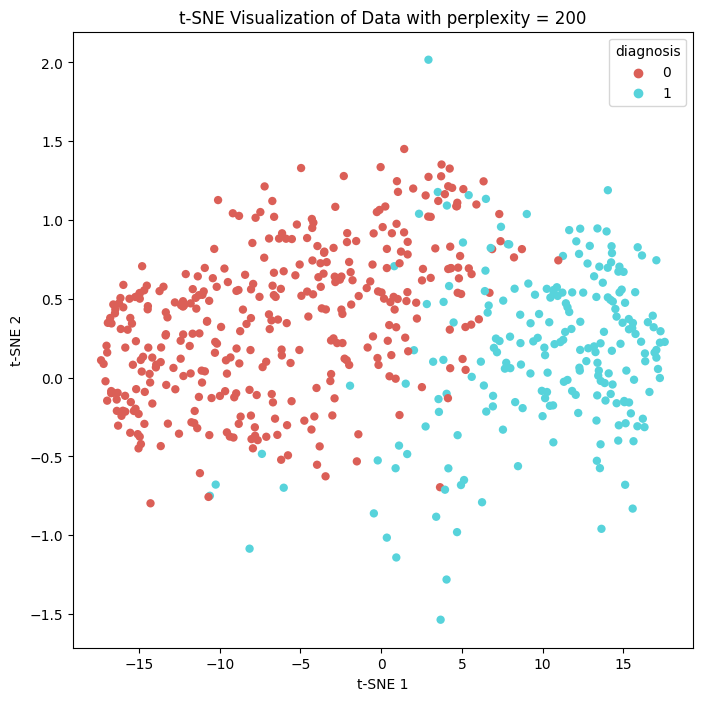

In [77]:
# Apply t-SNE with more high perplexity
tsne = TSNE(n_components=2, random_state=110, verbose=2, perplexity = 100)
x_tsne = tsne.fit_transform(x)


# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=1, edgecolor='none'
)


# plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 200')
plt.legend
plt.show()

Perplexity is a parameter used in t-SNE (t-distributed Stochastic Neighbor Embedding), a dimensionality reduction technique, to control the balance between local and global aspects of the data when mapping high-dimensional data into a lower-dimensional space.

In simpler terms, perplexity can be thought of as a measure of how to focus t-SNE's attention on the number of close neighbors each data point should consider during the dimensionality reduction process. A low perplexity value causes each data point to consider fewer neighbors, leading to a more global view of the data, whereas a high perplexity value makes each data point consider more neighbors, resulting in a more local view.

Choosing the right perplexity value is crucial as it can affect the resulting visualization. It's often recommended to experiment with different perplexity values to find the one that best captures the underlying structure of the data.

In [78]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0]

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 110)

In [80]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


In [81]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
results = {}


start_time = time.time()

logistic = LogisticRegression(max_iter=1000)  # Increase max_iter to allow more iterations
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

# print("Predictions:", y_pred)  # Print the predictions made by the model

# print("Predictions:")
# for i, pred in enumerate(y_pred):
#     if pred == 0:
#         print(f"Sample {i+1}: Cancer is Benign")
#     else:
#         print(f"Sample {i+1}: Cancer is Malignant")

end_time = time.time()
training_time = end_time - start_time

results['Logistic Regression'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])
df_results

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.964912,0.964912,0.964912,0.964912,0.552404


In [82]:
import pickle
with open('/kaggle/working/ML Practice.pkl', 'wb') as pickle_file:
    pickle.dump('logistic', pickle_file)
